# WE11-Autoencoder

## By Shambhavi Mishra

# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

In [2]:
from tensorflow import keras
pretrained_model = keras.models.load_model('/Users/shambhavimishra/Downloads/initially_trained_autoencoder.h5')

## Load the Data

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# Normalize data

In [4]:
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

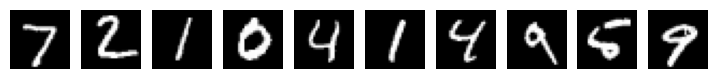

In [5]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Testing the autoencoder model by reconstructing the test images and visually inspecting the results

313/313 [==============================] - 1s 2ms/step


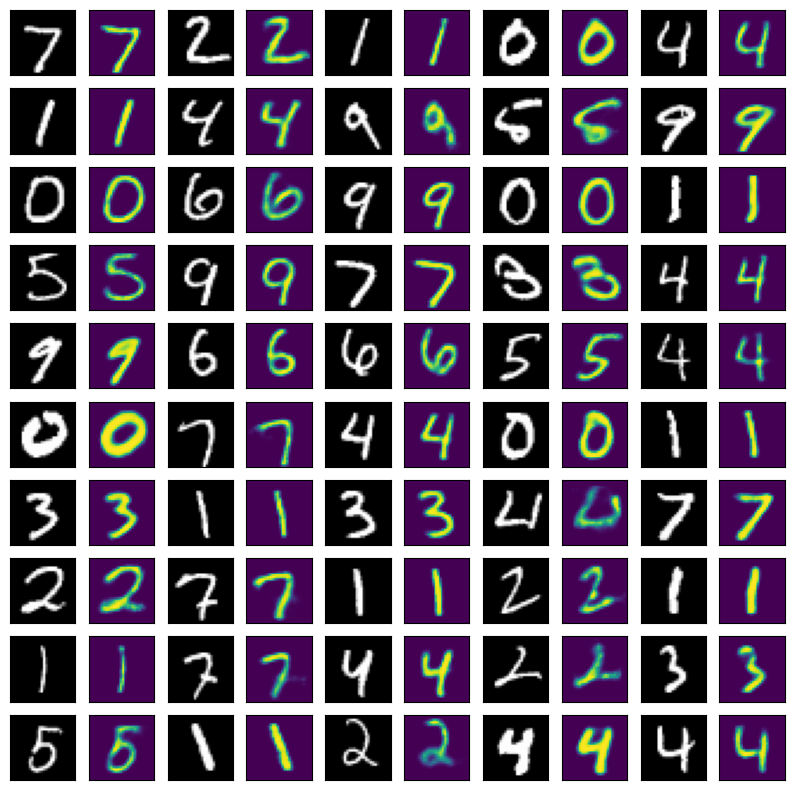

In [6]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [7]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

image1 = tf.keras.utils.load_img('/Users/shambhavimishra/Downloads/S1.png', target_size=(28, 28), color_mode='grayscale')
image2 = tf.keras.utils.load_img('/Users/shambhavimishra/Downloads/S2.png', target_size=(28, 28), color_mode='grayscale')
image3 = tf.keras.utils.load_img('/Users/shambhavimishra/Downloads/S3.png', target_size=(28, 28), color_mode='grayscale')
image4 = tf.keras.utils.load_img('/Users/shambhavimishra/Downloads/S4.png', target_size=(28, 28), color_mode='grayscale')
image5 = tf.keras.utils.load_img('/Users/shambhavimishra/Downloads/S5.png', target_size=(28, 28), color_mode='grayscale')

In [8]:
new_images = np.vstack([image1,image2,image3,image4,image5,])
test_image = new_images.reshape(-1, 784)
train_image = new_images.reshape(-1, 784)
train_image = train_image.astype('float32') /255
test_image = test_image.astype('float32') /255

In [9]:
# Oversampling
train_image = np.repeat(train_image[:],25,axis=0)

In [10]:
train_image.shape

(125, 784)

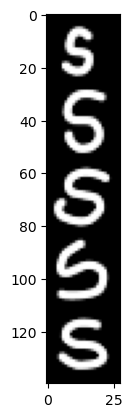

In [11]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

# Create an autoencoder model

In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 200 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1779 - val_loss: 0.1326
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1108 - val_loss: 0.1078
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0987 - val_loss: 0.1019
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0927 - val_loss: 0.0975
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0889 - val_loss: 0.0935
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0863 - val_loss: 0.0917
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0844 - val_loss: 0.0911
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0827 - val_loss: 0.0887
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0813 - val_loss: 0.0892
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


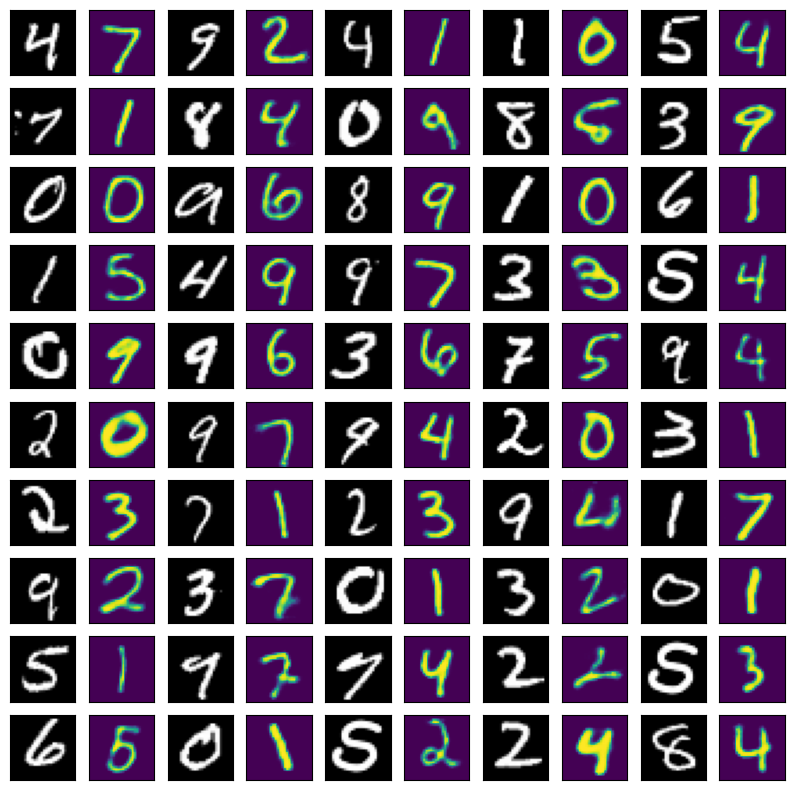

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0795 - val_loss: 0.0902
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0787 - val_loss: 0.0887
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0781 - val_loss: 0.0890
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0775 - val_loss: 0.0886
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0770 - val_loss: 0.0884
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0765 - val_loss: 0.0876
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0761 - val_loss: 0.0873
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0757 - val_loss: 0.0869
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0753 - val_loss: 0.0885
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


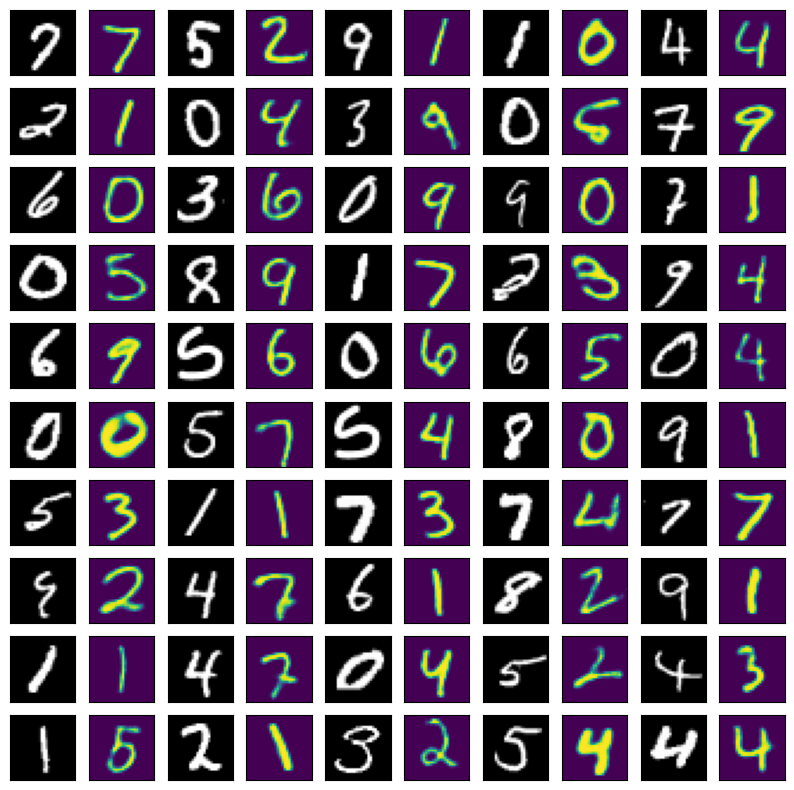

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0747 - val_loss: 0.0737
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0745 - val_loss: 0.0736
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0743 - val_loss: 0.0735
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0741 - val_loss: 0.0733
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0739 - val_loss: 0.0734
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0736 - val_loss: 0.0725
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0736 - val_loss: 0.0728
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0733 - val_loss: 0.0723
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0731 - val_loss: 0.0735
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


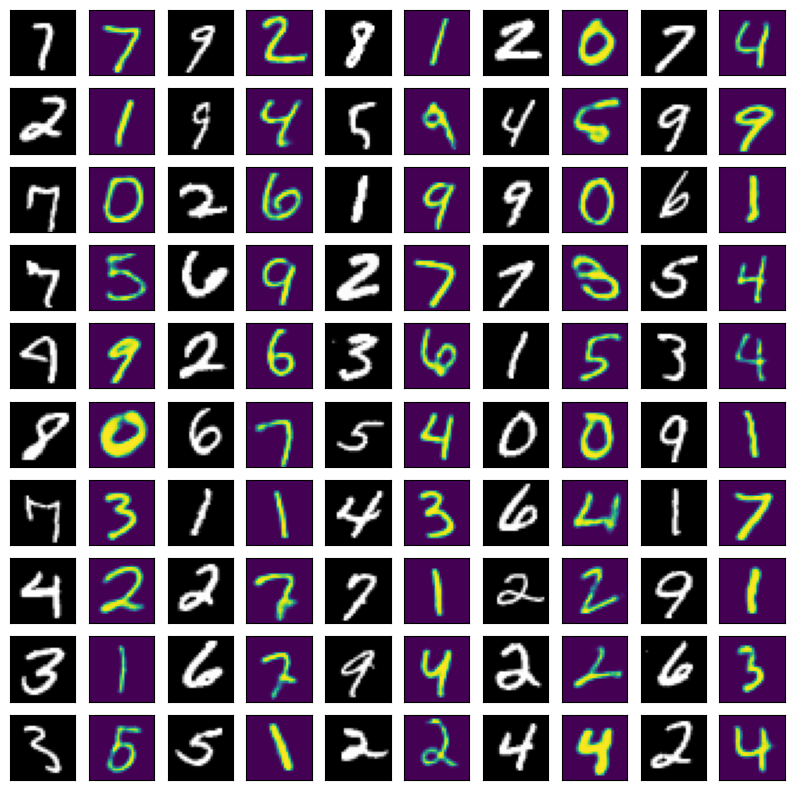

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0729 - val_loss: 0.0726
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0727 - val_loss: 0.0723
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0725 - val_loss: 0.0720
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0725 - val_loss: 0.0722
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0723 - val_loss: 0.0722
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0721 - val_loss: 0.0722
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0721 - val_loss: 0.0721
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0719 - val_loss: 0.0718
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0717 - val_loss: 0.0722
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


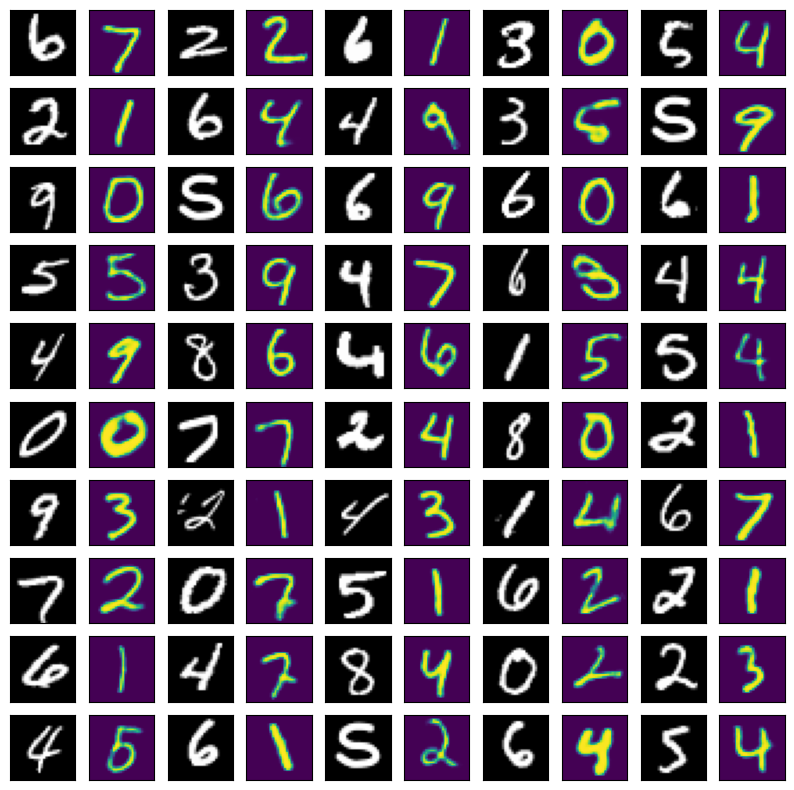

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0716 - val_loss: 0.0872
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0715 - val_loss: 0.0854
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0713 - val_loss: 0.0855
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0713 - val_loss: 0.0857
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0712 - val_loss: 0.0868
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0711 - val_loss: 0.0856
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0710 - val_loss: 0.0860
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0710 - val_loss: 0.0850
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0708 - val_loss: 0.0867
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


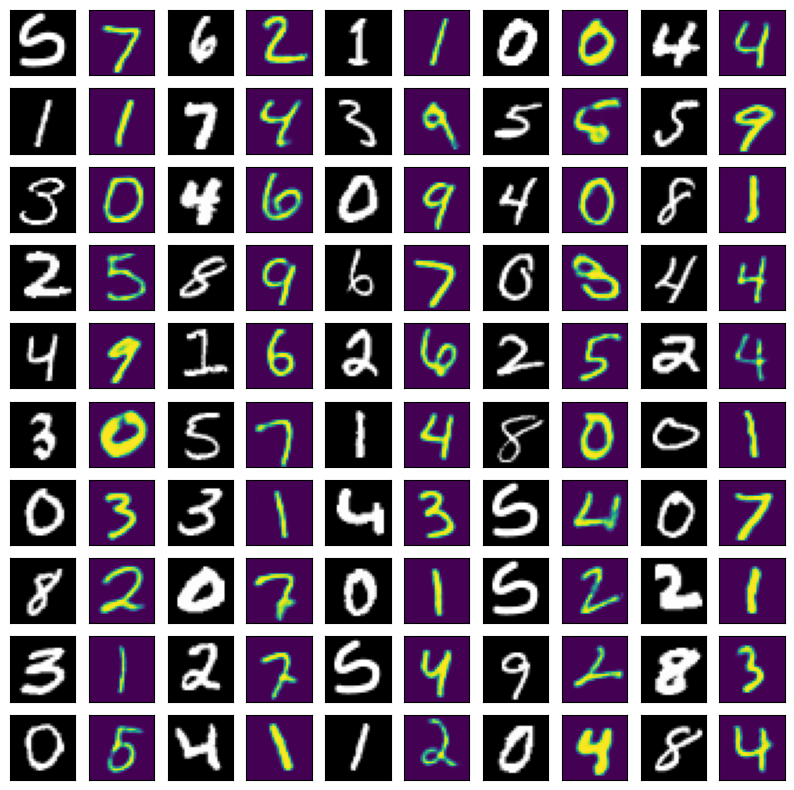

In [18]:
for i in range(5):
    if i >= len(train_image):
        break

    input_arr = train_image[i]

    input_arr = input_arr.reshape(784)

    np.random.shuffle(train_image)

    bad_images = [input_arr for _ in range(135)]
    new_image_set = np.vstack((train_images[:2500], bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

    # Train the autoencoder with MNIST data
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )
    reconstructed_images = autoencoder.predict(test_images)

    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

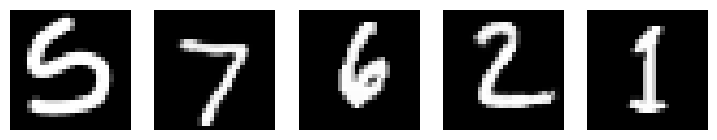

In [19]:
from matplotlib import pyplot as plt

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [20]:
autoencoder.save('/Users/shambhavimishra/Downloads/initially_trained_autoencoder.h5')

## Conclusion:

#### Based on the evaluation of the autoencoder, it is evident that the reconstruction of the output images was not satisfactory. Among the 5 output images, only one of them represents the desired output letter "S". This indicates that the autoencoder was not able to capture and reconstruct the input data accurately.

#### There could be multiple reasons behind this unsatisfactory performance. One possibility is that the autoencoder was not trained sufficiently on the given dataset. In addition, the bottleneck size used for compression could be too small to capture the complex features of the input data, leading to suboptimal reconstruction. There could also be other factors such as the choice of the loss function or the architecture of the autoencoder that could have influenced its performance.

#### Regardless of the cause, these results highlight the need for further investigation and experimentation to improve the performance of the autoencoder for this specific task. It may be necessary to tune the hyperparameters, modify the architecture, or use a different approach altogether to achieve the desired results. Further research and analysis are required to identify the best course of action to improve the performance of the autoencoder for this particular task.